# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. 
Is the distribution of body temperatures normal?

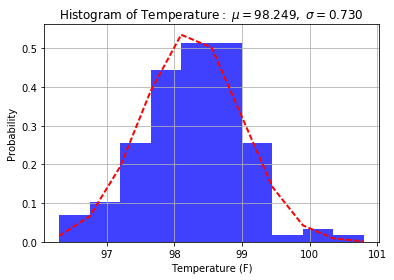

In [3]:
data = df.temperature
# best fit of data
(mu, sigma) = norm.fit(data)

# the histogram of the data
n, bins, patches = plt.hist(data, 10, normed=1, facecolor='blue', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Temperature (F)')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Temperature:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

# 2.
Is the sample size large? Are the observations independent?

In [4]:
df.shape[0]

130

# Conclusion:
The rule of thumb for the sample size is to see if the sample size is greater than 30. In this case, the sample size is 130. Hence, the sample size would be considered "large". It seems that the data is independently collected, so the observations are indenpendent. 

# 3. 
Is the true population mean really 98.6 degrees F? Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t  or  z  statistic?
Now try using the other test. How is the result be different? Why?

# Solution:
One-sample test since we are comparing the sample mean to the population mean.

T statistic should be used as the population standard deviation is unknown.


In [5]:
#1-sample T-test
T_test=stats.ttest_1samp(df.temperature, 98.6)
print(T_test)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [6]:
#1-smaple Z-test
z_value = (np.mean(df.temperature)-98.6)/(np.std(df.temperature)/np.sqrt(df.shape[0]))
p_value = 2*stats.norm.cdf(z_value, loc=0, scale=1)
print("z-value:", z_value, "\t", "p-value:", p_value)
Z_test = (z_value, p_value)

z-value: -5.47592520208 	 p-value: 4.35231516588e-08


In [7]:
print("t-value and its p-value:", T_test[0:2])
print("z-value and its p-value:", Z_test)
#T_test[0]

t-value and its p-value: (-5.4548232923645195, 2.4106320415561276e-07)
z-value and its p-value: (-5.4759252020781162, 4.3523151658821886e-08)


# Conclusion:
t-test and z-test presents similar results (t-score and z-score are really close) and they both reject the null hypothesis at 5% level, i.e. the sample mean differs from 98.6 F. 

# 4.
At what temperature should we consider someone's temperature to be "abnormal"?

In [8]:
sample_mean = np.mean(df.temperature)
t_critical = stats.t.ppf(q = 0.975, df = df.shape[0]-1)
margin_of_error = t_critical * (np.std(df.temperature)/np.sqrt(df.shape[0]))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  
print("Confident Interval:\n", confidence_interval)

Confident Interval:
 (98.12249318821641, 98.375968350245145)


# Conclusion:
Based on the given dataset, the 95%-level confidence interval is (98.12249318821641, 98.375968350245145). Therefore, temperatures outside the interval should be considered abnormal. 

# 5.
Is there a significant difference between males and females in normal temperature?

# Solution:
Since we are comparing two smaples in this problem, two-sample T-test will be used. 

In [9]:
Male = df.loc[df['gender'] == 'M']
Female = df.loc[df['gender'] == 'F']

In [10]:
# Assuming equal variance 
stats.ttest_ind(Male.temperature, Female.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [11]:
# Assuming non-equal variance (becomes Welch’s t-test under this assumption)
stats.ttest_ind(Male.temperature, Female.temperature, equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

# Conclusion:
Since p-value (0.0239) is less than 0.05, we can reject the null hypothesis at 5% level, i.e. the average temperature of male and female are different. 